# Decision Trees

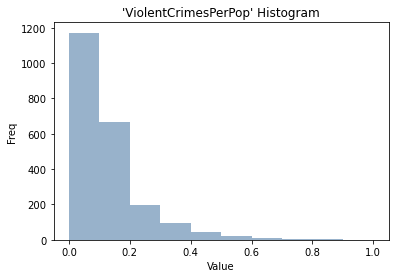

(1549, 100)
(665, 100)


In [43]:
%run Preprocessing.ipynb

In [44]:
# Import packages
import sklearn.feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import pandas as pd

In [45]:
# Load train and test sets from Preprocessing file
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Function for plotting confusion matrix
def plot_confusion_matrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()


## Feature Selection
- Build the model using the pre-processed data
- To avoid overfiting and slow computing (due to the increase in features from dummying as well as increasing dimensionality), selecting the most important features is important.


In [46]:
# select k best is a univariate method for feature selection:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x.columns[I] for I in indices_selected]

x_train_selected = x_train[colnames_selected]
x_test_selected = x_test[colnames_selected]

colnames_selected # 20 features selected


['PctKids2Par',
 'racePctWhite',
 'PctKidsBornNeverMar',
 'PctFam2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'racepctblack',
 'pctWInvInc',
 'pctWPubAsst',
 'PctPersOwnOccup',
 'PctPopUnderPov',
 'FemalePctDiv',
 'PctNotHSGrad',
 'PctHousNoPhone',
 'TotalPctDiv',
 'MalePctDivorce',
 'PctPersDenseHous',
 'PctHousOwnOcc',
 'PctHousLess3BR',
 'medFamInc']

## Build Decision tree #1

We create a basic DecisionTreeClassifier, and then will slowly tune the parameters.
- First, we check the **max depth**. The cell below will calculate the accuracy
score for a max depth up to *n*. This is then plotted in a bar graph.

NOTE: Why are we using the testing set at this stage? Should we perform k-fold validation and use that mean for this?

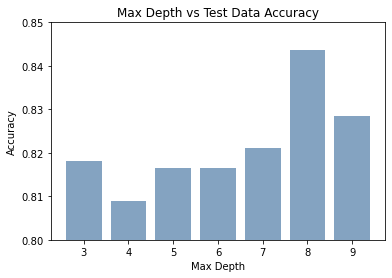

In [47]:
# Max depth hyper parameter choice plot
def max_depth(n):
    scores = {}
    for i in range(3, n):
        dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)  # use the entropy rather than gini index
        dtree.fit(x_train, y_train)
        # Assess accuracy at this stage
        clf = DecisionTreeClassifier()  # Create Decision Tree classifer object
        clf = clf.fit(x_train,y_train)  # Train Decision Tree Classifer
        y_pred = clf.predict(x_test)  # Predict the response for test dataset
        #print(i, "max_depth::", "Accuracy:",metrics.accuracy_score(y_test, y_pred))
        j = str(i)
        depth_score = {j: accuracy_score(y_test, y_pred)}
        scores.update(depth_score)
    return scores
d = max_depth(10)

colors = list("rgbcmyk")

for key in d:
    plt.bar([key], d[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('Max Depth vs Test Data Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0.80, 0.85)
plt.show()

For this dataset, we have shown that the max_depth at 6 provides the highest accuracy. Therefore, the current model is:

In [48]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6)  # use the entropy rather than gini index
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)  # Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8390977443609022


In [49]:
# most stylised tree:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

code adapted from https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
x_test.shape

In [ ]:
max_features = list(range(1,x_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('max features')
plt.show()

In [ ]:
kf =KFold(n_splits=4, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split = 0.6, ccp_alpha = 0.012, max_features = 70), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

**Build the Decision tree #2** - applying pre-pruning techniques

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split = 0.6, ccp_alpha = 0.012, max_features = 70)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# # Testing pre pruning

# params = {'max_depth': [2,4,6,8,10,12],  # why did we select these parameters?
#          'min_samples_split': [2,3,4],
#          'min_samples_leaf': [1,2]}
# gcv = GridSearchCV(estimator=clf,param_grid=params)
# gcv = gcv.fit(x_train,y_train)
# y_pred = gcv.predict(x_test)  # Predict the response for test dataset
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # better accuracy score


**K-Fold Classification** 
This will increase the number of times the test and train data is split, then will average out the accuracy scores. The cells below will increase the number of K up to 12, then plot the accuracy for the data.

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=5), x, y, cv= kf, scoring="accuracy")
    #print(f'Scores for each fold are: {score}')
    #print(f'Number of folds = {i} Average score: {"{:.2f}".format(score.mean())}')
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()

In [ ]:
kf =KFold(n_splits=4, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=6), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [ ]:
# Pre-pruning summary
classes = ['Low Violence', 'High Violence']
def plot_confusionmatrix(train_pred, train, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(train_pred,train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    
# model = gcv.best_estimator_
# model.fit(x_train,y_train)
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

**Build Decision Tree #3** - applying post-pruning techniques

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

Total impurity of leaves vs effective alphas of pruned tree:

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.

Scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# 1. Cost complexity pruning path
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Plot
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
# the maximum effective alpha value is removed, because it is the trivial tree with only one node.


In [ ]:
# 2. Train a decision tree using the effective alphas.
# The last value in ccp_alphas is the alpha value that prunes the whole tree, 
# this leaves the tree (clfs[-1]) with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
# 3. Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Show that the number of nodes and tree depth decreases as alpha increases.
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# 4. Compare accuracy vs alpha for training
# When ccp_alpha is set to zero, the tree overfits; leading to a 100% training accuracy and 88% testing accuracy.
# As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. 

train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# fit the model again with the most suitable alpha i.e. 0.008
# this alpha achieves the best test accuracy

tree = DecisionTreeClassifier(ccp_alpha=0.01, random_state=40)
tree.fit(x_train, y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

print("Pruned tree train accuracy score: ", accuracy_score(y_train, y_train_pred),
"Pruned tree test accuracy score: ", accuracy_score(y_test, y_test_pred))

In [ ]:
# extra graphs needed 
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
    